# Understanding Variables in ASTx: A Comprehensive Guide

## Introduction

In the world of programming, the concept of variables is fundamental, acting as the cornerstone for writing effective and efficient code. However, the way variables are declared and used can vary significantly across different programming languages. This variability poses a challenge for tools that need to operate across these languages, such as ASTx. ASTx, an advanced tool for manipulating abstract syntax trees (ASTs), addresses this challenge by offering a generic approach to handling variables. This blog post delves into the nuances of working with variables in ASTx, providing insights into both declaration and usage, with a focus on simplicity and generality.

## Setting Up the Environment

To get started with variables in ASTx, you need to set up your Python environment appropriately. This setup involves importing necessary modules and ensuring that your environment is primed for the tasks ahead. Here's how you can set it up:

First, ensure you have astx installed:

```bash
$ pip install astx
```

Now, you can import the libraries and modules necessary for this tutorial:

In [1]:
from __future__ import annotations

import copy

from typing import Any

from IPython.display import display

import astx

This code block sets the stage for our exploration into ASTx's variable handling. We're importing essential modules like `copy` for deep copying objects, `typing` for type annotations, and `IPython.display` for displaying outputs in an interactive Python environment. Most importantly, we import `astx`, the library central to our discussion.

## Creating Variables and Performing Simple Math

Now, let's dive into the practical aspects of variable declaration and usage in ASTx, particularly how these variables can be used in basic mathematical operations.

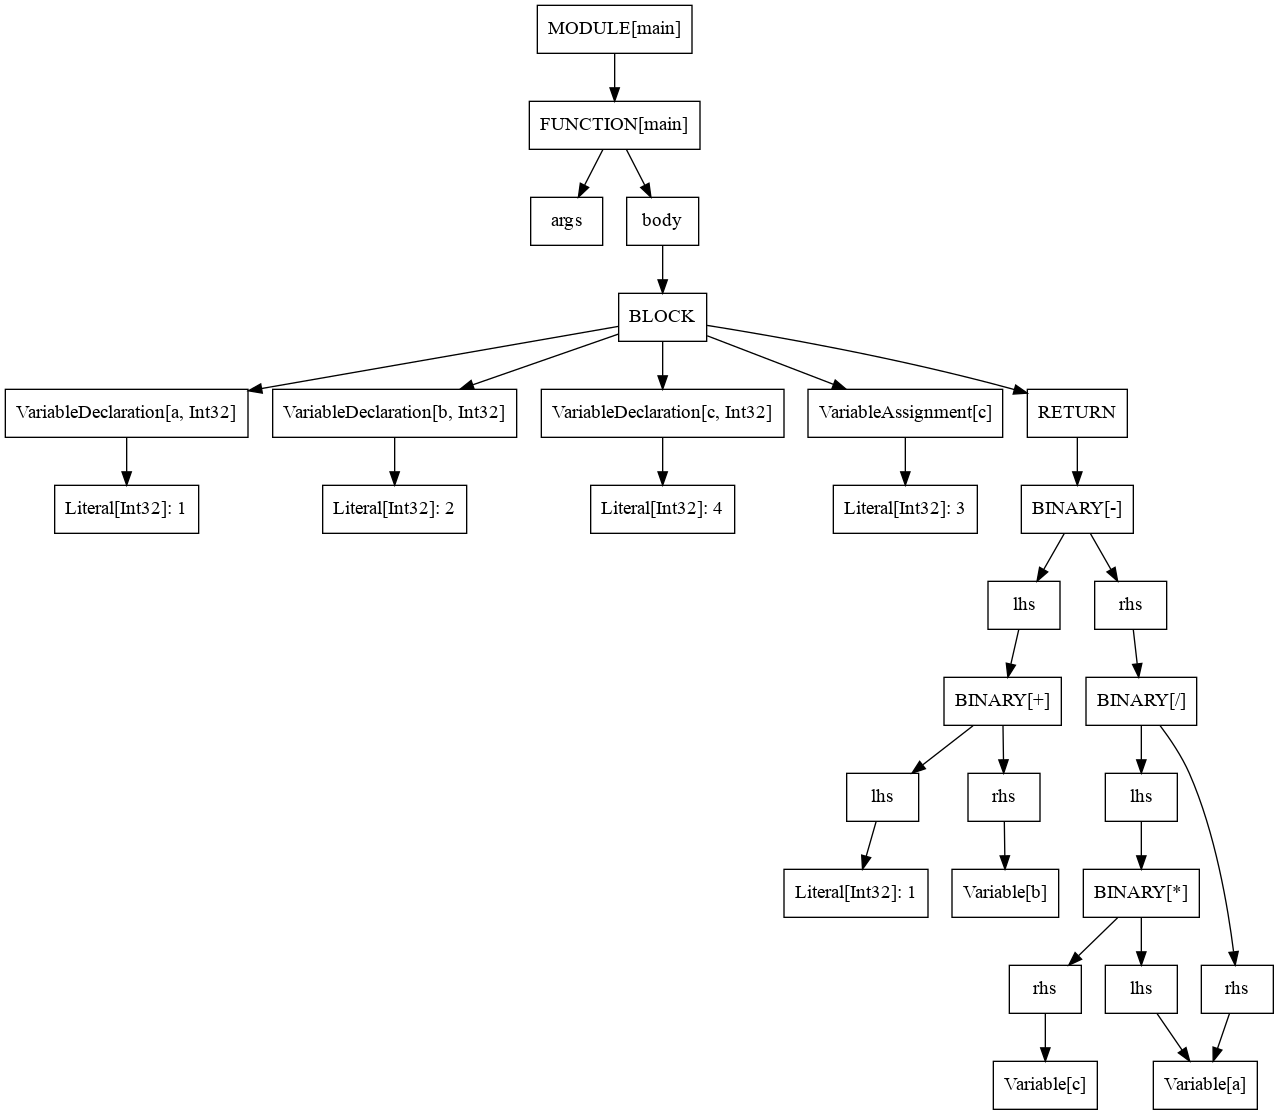

In [2]:
# Initialize the ASTx module
module = astx.Module()

# Declare variables 'a', 'b', and 'c' with initial values
decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
decl_c = astx.VariableDeclaration(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

# Reassign a new value to variable 'c'
assign_c = astx.VariableAssignment(name="c", value=astx.LiteralInt32(3))

# Create ASTx Variable objects
a = astx.Variable(name="a")
b = astx.Variable(name="b")
c = astx.Variable(name="c")

# Create a literal integer
lit_1 = astx.LiteralInt32(1)

# Perform basic operations
basic_op = lit_1 + b - a * c / a

# Define the main function prototype
main_proto = astx.FunctionPrototype(
    name="main", args=[], return_type=astx.Int32
)

# Create a block of code and append variable declarations and operations
main_block = astx.Block()
main_block.append(decl_a)
main_block.append(decl_b)
main_block.append(decl_c)
main_block.append(assign_c)
main_block.append(astx.FunctionReturn(basic_op))

# Define the main function with its body
main_fn = astx.Function(prototype=main_proto, body=main_block)

# Append the main function to the module block
module.block.append(main_fn)
module

In this code snippet, we start by initializing an ASTx module. We then declare three variables (`a`, `b`, and `c`) with initial integer values using `VarDecl`. Interestingly, we demonstrate how to reassign a new value to an existing variable (`c` in this case). The `Variable` class in ASTx is used to create variable objects that can be manipulated further.

Next, we create a simple mathematical operation involving these variables, showcasing how ASTx can elegantly handle arithmetic expressions. The code concludes with the creation of a main function prototype, a block of code containing our declarations and operations, and the definition of the main function itself.

## Conclusion

This exploration into the world of variables within ASTx reveals the power and flexibility of this tool. By abstracting the intricacies of variable handling across different programming languages, ASTx provides a unified and streamlined approach. Whether you are a seasoned developer or just starting, understanding how to effectively declare and manipulate variables in ASTx is a valuable skill in your programming toolkit.